In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
#define model function and pass independant variables x and y as a list
def twoD_Gaussian((x,y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
     
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()

In [ ]:
# Create x and y indices
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
x,y = np.meshgrid(x, y)

print x.shape
print y.shape

#create data
data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(201,201))
plt.colorbar()

In [ ]:
# add some noise to the data and try to fit the data generated beforehand
initial_guess = (3,100,100,20,40,0,10)

data_noisy = data + 0.2*np.random.normal(size=data.shape)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x,y), data_noisy, p0 = initial_guess)
print x.shape

In [ ]:
data_fitted = twoD_Gaussian((x, y), *popt)
print x.shape
fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data_noisy.reshape(201, 201), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(201, 201), 8, colors='w')
plt.show()

# Testing

In [3]:
file = open("test_image.txt", "r")
test_image = pickle.load(file)
file.close()

In [4]:
test_image.shape

(90, 20)

In [5]:
print test_image

[[ 4.0002255  3.016954   3.0479958 ...  2.9831026  1.997243   0.       ]
 [ 5.8727455 14.113328   2.0214963 ...  1.9798814  3.0083761 -1.0068678]
 [ 3.0034878  1.0572925  9.689339  ...  0.9438027  3.814166   3.1254227]
 ...
 [22.132273  30.257576  27.249277  ... 19.837215  18.777105  26.598648 ]
 [38.959152  31.012133  35.44486   ... 26.647377  24.044285  22.812052 ]
 [38.408997  28.914703  35.122715  ... 29.82582   30.950285  26.787922 ]]


In [6]:
type(test_image)

numpy.ndarray

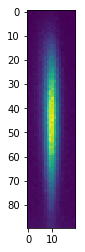

In [7]:
plt.imshow(test_image)

In [11]:
#initial_guess = (3,100,100,20,40,0,10)
initial_guess = [800, 10, 45, 5, 25, 0, 0]
x = np.arange(0, 20)
y = np.arange(0, 90)
x,y = np.meshgrid(x, y)
popt, pcov = opt.curve_fit(twoD_Gaussian, (x,y), test_image.flatten(), p0 = initial_guess)

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  after removing the cwd from sys.path.


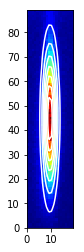

In [17]:
data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(test_image.reshape(90, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(90, 20), 8, colors='w')
plt.show()

In [14]:
print popt

[7.80021632e+02 9.39703762e+00 4.47632003e+01 1.90119641e+00
 1.81172138e+01 9.39046842e-04 1.81796385e+01]


In [ ]:
print type(x)
print type(y)

In [ ]:
x = np.arange(0, 20)
y = np.arange(0, 90)
x,y = np.meshgrid(x, y)

#create data
data = twoD_Gaussian((x, y), 800, 10, 45, 5, 25, 0, 0)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(90,20))
plt.colorbar()

In [ ]:
conda activate 